In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score
import joblib

In [2]:
pd.set_option('max_colwidth', 1400)
pd.options.display.width = 1200

Źródło danych:
https://dane.gov.pl/en/dataset/1176,lista-beneficjentow-projektow-funduszy-europejskich-2014-2020


In [3]:
#df = pd.read_csv('Lista_projektow_FE_2017_2021_171023.csv')
df = pd.read_csv('Lista_projektow_FE_2014_2020_020124.csv')

In [4]:
#df.info()
cols = df.columns
print('Do analizy TF-IDF : ',cols[0])
print('Do analizy TF-IDF : ',cols[1])
print('Do klasyfikacji   : ',cols[4])
print('Do klasyfikacji   : ',cols[19])
print('Do regresji      : ',cols[9])
print('Do regresji      : ',cols[10])
print('Do regresji      : ',cols[11])

print(cols[13:18])

Do analizy TF-IDF :  Tytuł projektu/ Project name
Do analizy TF-IDF :  Skrócony opis [do 2000 znaków] / Project summary
Do klasyfikacji   :  Fundusz/ Fund
Do klasyfikacji   :  Dziedzina działalności gospodarczej, której dotyczy projekt/ Area of economic activity
Do regresji      :  Wartość projektu (w zł, dla projektów EWT w euro)/ Total project value (PLN, for ETC projects EUR)
Do regresji      :  Wydatki kwalifikowalne (w zł, dla projektów EWT w euro)/ Total eligible expenditure (PLN, for ETC projects EUR)
Do regresji      :  Wartość unijnego dofinansowania (w zł, dla projektów EWT w euro)/ Amount of EU co-financing (PLN, for ETC projects EUR)
Index(['Forma finansowania/ Form of finance', 'Miejsce realizacji projektu/ Project location', 'Typ obszaru, na którym realizowany jest projekt/ Territory type', 'Data rozpoczęcia realizacji projektu/ Project start date', 'Data zakończenia realizacji projektu/ Project end date'], dtype='object')


In [5]:
for c in cols[26:30]:
    print(c)
    print(df[c].unique())

Index(['Wartość projektu (w zł, dla projektów EWT w euro)/ Total project value (PLN, for ETC projects EUR)', 'Wydatki kwalifikowalne (w zł, dla projektów EWT w euro)/ Total eligible expenditure (PLN, for ETC projects EUR)', 'Wartość unijnego dofinansowania (w zł, dla projektów EWT w euro)/ Amount of EU co-financing (PLN, for ETC projects EUR)'], dtype='object')


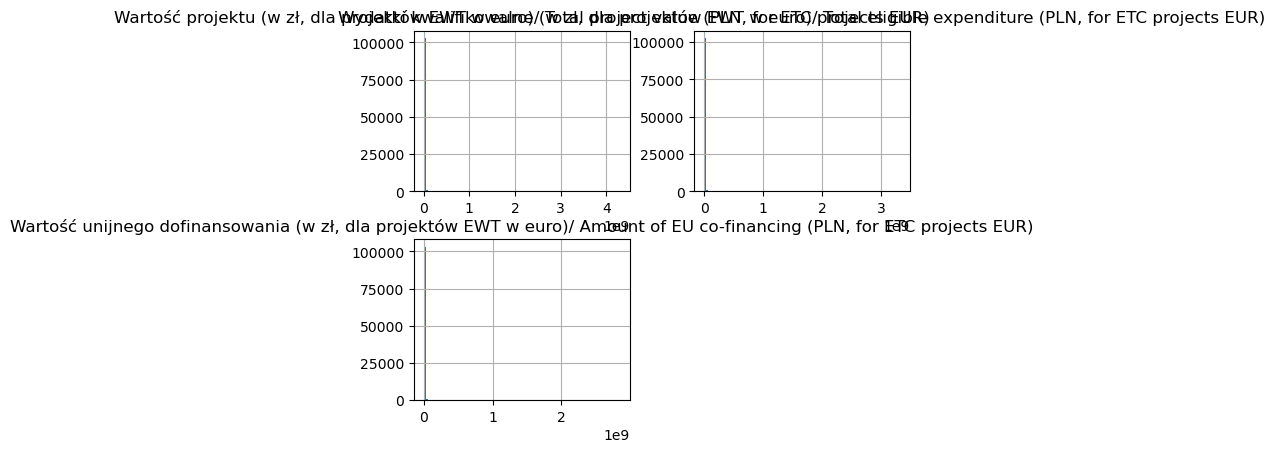

In [6]:
print(df.columns[9:12])
df.iloc[:,9:12].hist(bins=100);

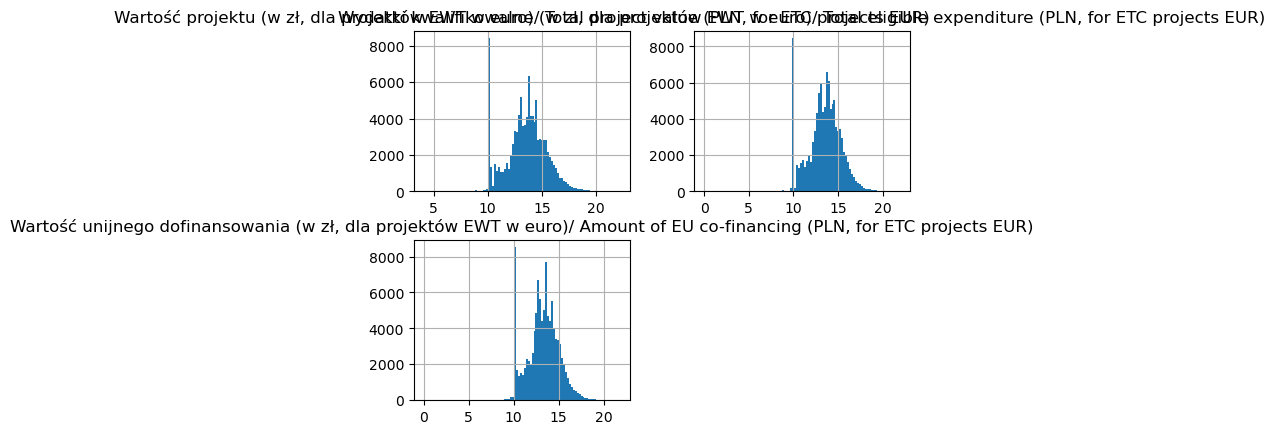

In [7]:
np.log(df.iloc[:,9:12]+1).hist(bins=100);

In [8]:
documents = df.iloc[:,0]+df.iloc[:,1]
fin_warto = np.log(df.iloc[:,9].fillna(1)+1)
fin_kwali = np.log(df.iloc[:,10]+1)
fin_dofin = np.log(df.iloc[:,11]+1)
fundusz = df.iloc[:,4].astype(str)
dziedz = df.iloc[:,19].astype(str)

In [9]:
df.describe()

Wartość projektu (w zł, dla projektów EWT w euro)/ Total project value (PLN, for ETC projects EUR)  Wydatki kwalifikowalne (w zł, dla projektów EWT w euro)/ Total eligible expenditure (PLN, for ETC projects EUR)  Wartość unijnego dofinansowania (w zł, dla projektów EWT w euro)/ Amount of EU co-financing (PLN, for ETC projects EUR)  Poziom unijnego dofinansowania w procentach (w %)/ Union co-financing rate (%)
count                                                                                        1.044620e+05                                                                                                     1.044640e+05                                                                                                             1.044640e+05                                                                   104463.000000
mean                                                                                         5.682795e+06                                                                                                     4.483507e+06                                                                                                             3.481933e+06                                                                       81.682823
std                                                                                          5.710127e+07                                                                                                     3.814639e+07                                                                                                             3.204890e+07                                                                       14.704195
min                                                                                          5.882000e+01                                                                                                     0.000000e+00                                                                                                             0.000000e+00                                                                        0.000000
25%                                                                                          2.567512e+05                                                                                                     2.420308e+05                                                                                                             1.986397e+05                                                                       80.000000
50%                                                                                          8.584657e+05                                                                                                     7.939919e+05                                                                                                             6.093140e+05                                                                       84.999999
75%                                                                                          2.500000e+06                                                                                                     2.202566e+06                                                                                                             1.707185e+06                                                                       85.000000
max                                                                                          4.296273e+09                                                                                                     3.319219e+09                                                                                                             2.850000e+09                                                                      100.000000

In [10]:
#np.log(categories).hist(bins=100)
#np.log(finances).hist(bins=100)

In [11]:
X_train, X_test, \
y_train_fin_warto, y_test_fin_warto, \
y_train_fin_kwali, y_test_fin_kwali, \
y_train_fin_dofin, y_test_fin_dofin, \
y_train_fundusz, y_test_fundusz, \
y_train_dziedz, y_test_dziedz = train_test_split(documents, fin_warto, fin_kwali, fin_dofin, fundusz, dziedz,
                                                    test_size=0.2, 
                                                    random_state=42)

In [12]:
tfidf_vectorizer = TfidfVectorizer()
X_full_tfidf = tfidf_vectorizer.fit_transform(documents)
joblib.dump(tfidf_vectorizer,"vectoriser.sav")

['vectoriser.sav']

In [25]:
X_full_tfidf.to_hdf('vector_tfidf.hdf')

AttributeError: 'csr_matrix' object has no attribute 'to_hdf'

In [13]:
X_train_tfidf = tfidf_vectorizer.transform(X_train)

In [14]:
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [15]:
#model_category = LinearRegression()
#model_category = RandomForestClassifier()
#model_category.fit(X_train_tfidf, y_train_category)

In [16]:
#y_pred_category = model_category.predict(X_test_tfidf)

In [17]:
#confusion_matrix(y_test_category, y_pred_category)

In [18]:
model_fin_warto = LinearRegression()
model_fin_warto.fit(X_train_tfidf, y_train_fin_warto)
y_pred_fin_warto = model_fin_warto.predict(X_test_tfidf)
mse_fin_warto = mean_squared_error(y_test_fin_warto, y_pred_fin_warto)
print(f"Mean Squared Error for fin_warto: {mse_fin_warto}")
joblib.dump(model_fin_warto,"model_fin_warto.sav")

Mean Squared Error for fin_warto: 11.20852945443602


['model_fin_warto.sav']

In [19]:
model_fin_kwali = LinearRegression()
model_fin_kwali.fit(X_train_tfidf, y_train_fin_kwali)
y_pred_fin_kwali = model_fin_kwali.predict(X_test_tfidf)
mse_fin_kwali = mean_squared_error(y_test_fin_kwali, y_pred_fin_kwali)
print(f"Mean Squared Error for fin_warto: {mse_fin_kwali}")
joblib.dump(model_fin_warto,"model_fin_kwali.sav")

Mean Squared Error for fin_warto: 11.273784721032534


['model_fin_kwali.sav']

In [20]:
model_fin_dofin = LinearRegression()
model_fin_dofin.fit(X_train_tfidf, y_train_fin_dofin)
y_pred_fin_dofin = model_fin_dofin.predict(X_test_tfidf)
mse_fin_dofin = mean_squared_error(y_test_fin_dofin, y_pred_fin_dofin)
print(f"Mean Squared Error for fin_dofin: {mse_fin_dofin}")
joblib.dump(model_fin_dofin,"model_fin_dofin.sav")

Mean Squared Error for fin_dofin: 11.15057773177729


['model_fin_dofin.sav']

In [21]:
model_fundusz = DecisionTreeClassifier()
model_fundusz.fit(X_train_tfidf, y_train_fundusz)
y_pred_fundusz = model_fundusz.predict(X_test_tfidf)
print(f'Accuracy: {accuracy_score(y_pred_fundusz, y_test_fundusz)}')
joblib.dump(model_fundusz,"model_fundusz.sav")

['model_fundusz.sav']

In [22]:
model_dziedz = DecisionTreeClassifier()
model_dziedz.fit(X_train_tfidf, y_train_dziedz)
y_pred_dziedz = model_dziedz.predict(X_test_tfidf)
print(f'Accuracy: {accuracy_score(y_pred_dziedz, y_test_dziedz)}')
joblib.dump(model_dziedz,"model_dziedz.sav")

['model_dziedz.sav']

In [26]:
nn_model = NearestNeighbors(n_neighbors=3, metric='cosine')
nn_model.fit(X_full_tfidf)
joblib.dump(nn_model,"model_nn.sav")

['model_nn.sav']

# Dalej to jest część produkcyjna (tutaj testowa) - tu zadaje się pytania

In [31]:
for new_document in ["rozwój potencjału aktorów polityki miejskiej",
                     "doposażenia stanowiska pracy i bonu na zasiedlenie",
                     "ludność wiejska, młodzież, doradztwo zawodowe",
                     "niepełnosprawność dostosowanie adaptacja",
                     "MFiPR",
                     "możliwość zdobycia umiejętności cyfrowych w Kłodzku",
                     "zawieszenie spadek aktywności działalności w okresie pandemii covid",
                     "administrowanie szkolnymi systemami informatycznymi",
                     "nauczyciele",
                     "naprawa rowerów",
                     "usługi stomatologiczne nocą"]:
    print("==================================================================")
    print("==================================================================")
    print(f"New Document: {new_document}")
    print("==================================================================")
    new_document_tfidf = tfidf_vectorizer.transform([new_document])
    print(f"Predicted fin_warto : {np.round(np.exp(model_fin_warto.predict(new_document_tfidf)),2)}")
    print(f"Predicted fin_kwali : {np.round(np.exp(model_fin_kwali.predict(new_document_tfidf)),2)}")
    print(f"Predicted fin_dofin : {np.round(np.exp(model_fin_dofin.predict(new_document_tfidf)),2)}")
    print(f"Predicted fundusz   : {model_fundusz.predict(new_document_tfidf)}")
    print(f"Predicted dziedzina : {model_dziedz.predict(new_document_tfidf)}")
    
    print("==================================================================")
    #new_document_tfidf = tfidf_vectorizer.transform(new_document)
    _, indices = nn_model.kneighbors(new_document_tfidf)
    
    most_similar_projects = df.iloc[indices[0]] #['Nazwa projektu/ Project name']
    print("Most Similar Projects:")
    print(most_similar_projects)
    print('---------------------------------------------------')

New Document: rozwój potencjału aktorów polityki miejskiej
Predicted fin_warto : [79683.5]
Predicted fin_kwali : [67777.03]
Predicted fin_dofin : [82017.96]
Predicted fundusz   : ['FS']
Predicted dziedzina : ['19 Edukacja']
Most Similar Projects:
                                                                         Tytuł projektu/ Project name  \
59464        Dotacja dla firmy Cafe u Aktorów na finansowanie i zapewnienie jej bieżącej działalności   
19792  Rozwój potencjału beneficjentów i potencjalnych beneficjentów FE w obszarze polityki miejskiej   
19782                                                                         Projekty pilotażowe JST   

                                                                                                                                                                                                                                                                                                                                            

In [24]:
#nn_model = NearestNeighbors(n_neighbors=5, metric='cosine')
#nn_model.fit(X_full_tfidf)

#new_document_tfidf = tfidf_vectorizer.transform(new_document)
#_, indices = nn_model.kneighbors(new_document_tfidf)

#most_similar_projects = df.iloc[indices[0]] #['Nazwa projektu/ Project name']
#print("Most Similar Projects:")
#print(most_similar_projects)